<h3>Загрузка датасету та бібліотек</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [2]:
bbox = {'boxstyle' : 'round',
        'pad' : 0.5,
        'facecolor' : 'white',
        'edgecolor' : 'black',
        'linewidth' : 1,
        'alpha' : 1}

plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('wine-clustering.csv')
print(df.shape)
df.head()

(178, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<p> 
    
     1. Alcohol (Спиртова речовина):
     Відсотковий вміст алкоголю у вині. Цей параметр вимірює кількісний вміст етанолу у вині та впливає на його міцність.

     2. Malic Acid (Яблучна кислота):
     Кількість яблучної кислоти у вині. Яблучна кислота надає вину свіжості та яскравості.

     3. Ash (Зольність):
     Кількість мінеральних речовин (золи) у вині після випаровування води та спалювання залишків. Він відбиває мінеральність вина.

     4. Alcalinity of Ash (Лужність золи):
     Лужність золи у вині. Лужність вимірює pH-рівень вина та впливає на його смакові характеристики.

     5. Magnesium (Магній):
     Кількість магнію у вині. Магній є одним з мікроелементів, які можуть впливати на смак та аромат вина.

     6. Total Phenols (Загальна кількість фенолів):
     Загальна кількість фенольних сполук у вині. Феноли є антиоксидантами і можуть впливати на смак та колір вина.

     7. Flavanoids (Флавоноїди):
     Кількість флавоноїдів у вині. Флавоноїди також є фенольними сполуками і можуть робити внесок у смак і колір вина, а також мають  антиоксидантні властивості.

     8. Nonflavanoid Phenols (НЕ флавоноїдні феноли):
     Кількість фланоноїдних фенольних сполук у вині.

     9. Proanthocyanins (Проантоціанідини):
     Кількість проантоціанідинів у вині. Проантоціанідини також належать до групи фенольних сполук.

     10. Color Intensity (Інтенсивність кольору):
     Інтенсивність кольору вина вимірюється як абсорбція світла при певній довжині хвилі. Цей параметр пов'язаний із глибиною кольору вина.

     11. Hue (Відтінок):
     Відтінок вина вимірюється на колірній шкалі. Це значення може змінюватись від помаранчевого до фіолетового і пов'язане з тонкістю кольору вина.

     12. OD280/OD315 of Diluted Wines (Оптична щільність при розведених винах):
     Оптична щільність вина за певної довжини хвилі. Цей параметр може бути пов'язаний із вмістом вина антоціану (пігменти, що надають вину червоного кольору).

     13. Proline (Пролін):
     Кількість амінокислоти проліну у вині. Пролін може впливати на текстуру та структуру вина.</p>

In [6]:
# Інформація про набір даних
data = pd.DataFrame()

data.index =  df.columns
data['count_NaN'] = df.isna().sum()
data['dtypes'] = df.dtypes
data['uniq'] = df.nunique()
data['repeat'] = df.shape[0] - data['uniq']
data['shape'] = df.shape[0]
data

,count_NaN,dtypes,uniq,repeat,shape
Alcohol,0,float64,126,52,178
Malic_Acid,0,float64,133,45,178
Ash,0,float64,79,99,178
Ash_Alcanity,0,float64,63,115,178
Magnesium,0,float64,53,125,178
Total_Phenols,0,float64,97,81,178
Flavanoids,0,float64,132,46,178
Nonflavanoid_Phenols,0,float64,39,139,178
Proanthocyanins,0,float64,101,77,178
Color_Intensity,0,float64,132,46,178


<h3>Стандартизація даних, щоб вони були в одному діапазоні</h3>

In [5]:
columns = df.columns
df[columns] = scaler.fit_transform(df[columns])
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


<h3>Вибір оптимального значення к-сті кластерів (гіперпараметр k)</h3>

C:\Users\amigo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amigo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amigo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amigo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

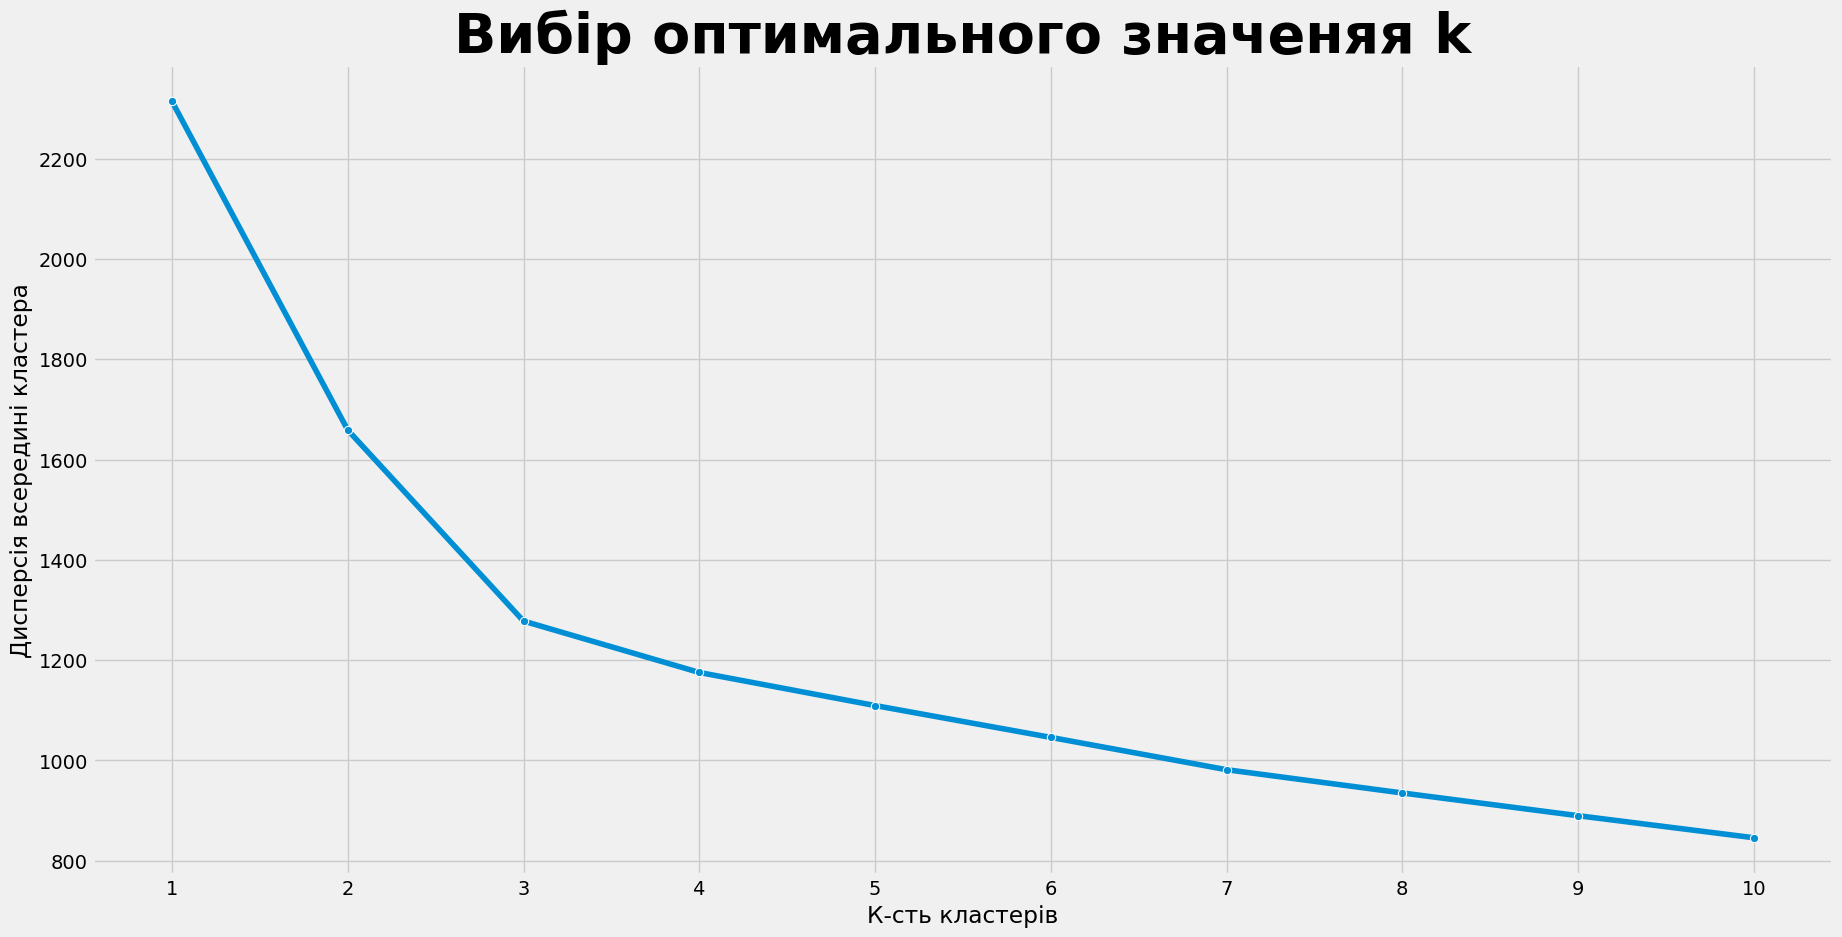

In [8]:
# Список для записей дисперсії
inertia_score = []

# Тренування моделі кластеризації з різним параметром k 
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(df)
    inertia_score.append(kmeans.inertia_)
    
# Побудова графіка    
fig = plt.subplots(figsize = (20,10))
sns.lineplot(x = range(1,11),
             y = inertia_score,
             marker = 'o')
plt.title('Вибір оптимального значеняя k', fontsize = 40, fontweight = 'bold')
plt.xlabel('К-сть кластерів')
plt.ylabel('Дисперсія всередині кластера')
plt.xticks(range(1,11))

plt.show()

<p><b>На графіку видно, що найсильніший спад дисперсії виникає, коли параметр k = 3. Далі вже к-сть кластерів мало опускає значення дисперсії</b></p>

<h3>Побудова моделі K-means</h3>

In [9]:
kmeans = KMeans(n_clusters = 3,
                n_init = 10,
                algorithm = 'elkan')

kmeans.fit(df)

KMeans(algorithm='elkan', n_clusters=3, n_init=10)

<h3>Оцінювання моделі за допомогою метрик Метод Силуету та Критерій варіації</h3>

In [11]:
# Мітки кластерів
labels = kmeans.labels_

silhouette = silhouette_score(df, labels)
chi = calinski_harabasz_score(df, labels)
print('Силуэт', round(silhouette,3))
print('Variance Rarion Criterion', round(chi,3))

Силуэт 0.285
Variance Rarion Criterion 70.94


<h3>Візуалізація результату кластеризації з центрами кластерів</h3>

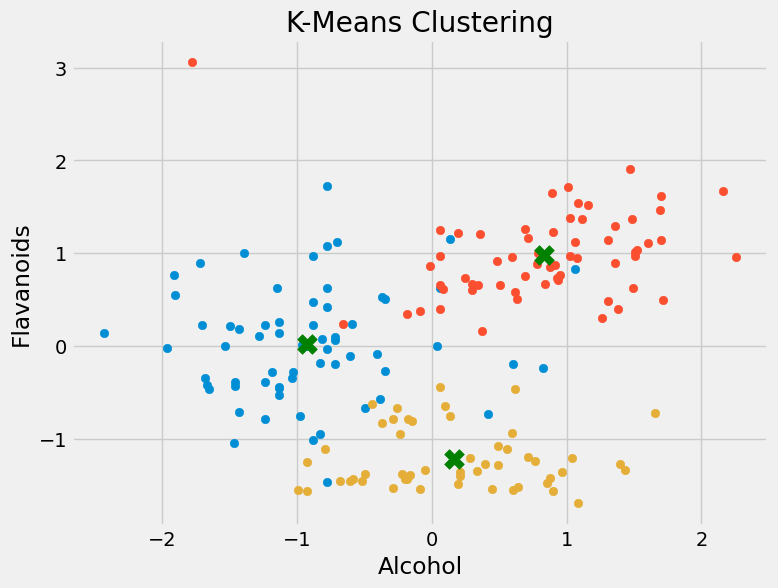

In [14]:
# Центроиды для каждого кластера
centroids = kmeans.cluster_centers_

# Визуализация данных и центров кластеров
plt.figure(figsize=(8, 6))

# Визуализируем данные по кластерам
for i in range(3):
    plt.scatter(df.iloc[labels == i, 0], df.iloc[labels == i, 6])

# Визуализируем центры кластеров
plt.scatter(centroids[:, 0], centroids[:, 6], marker='X', s=200, color='green')

plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.title('K-Means Clustering')
plt.show()

<h3>Повернення даних в початковий вид (до стандартизації) для більш чіткої візуалізації кластеризації</h3>

In [ ]:
columns = df.columns
df[columns] = scaler.inverse_transform(df[columns])

In [27]:
data_labels = pd.DataFrame()
data_labels['KMeans'] = labels
# Ознака міток
metka = data_labels['KMeans']
df['Label'] = metka

df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Label
0,32.850945,7.061166,3.195796,257.420894,27281.394383,4.818040,7.086389,0.411074,3.244880,46.892806,1.229709,6.425659,1.052545e+08,1
1,32.175925,7.148036,3.174092,208.624759,21804.624530,4.759616,6.788755,0.410766,2.915868,40.159044,1.230229,6.165006,1.037754e+08,1
2,32.149710,7.867818,3.213758,290.690986,22007.467858,4.818040,7.264969,0.411382,3.414272,47.106577,1.229190,6.049718,1.170877e+08,1
3,32.942695,7.359007,3.201035,270.728930,24441.587792,5.227003,7.512998,0.410458,3.209047,58.436399,1.220358,6.190069,1.461775e+08,1
4,32.202139,8.153249,3.228726,317.307059,25455.804432,4.818040,6.719307,0.412768,3.091775,39.838389,1.229709,5.929417,7.271334e+07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,32.510158,11.950722,3.197293,311.762044,20790.407891,4.381812,4.655711,0.414770,2.844202,57.901973,1.208928,5.332924,7.320639e+07,2
174,32.306997,9.791375,3.199538,339.487120,22210.311186,4.428551,4.794607,0.413384,2.958216,55.764271,1.212046,5.242698,7.419249e+07,2
175,32.221800,10.250546,3.183073,306.217028,25861.491088,4.346758,4.735080,0.413384,2.938671,71.262613,1.206331,5.242698,8.257430e+07,2
176,32.156264,8.153249,3.191305,306.217028,25861.491088,4.370127,4.725159,0.414924,2.974504,66.452783,1.206850,5.272773,8.306735e+07,2
